In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


In [316]:
df=pd.read_csv("전처리/최종 전처리 데이터.csv")
df

,일자,행정동명,년,월,일,사망자수,확진자수,10만명당 발생률,일별예상승객총합,일별예상승객편차,...,월배출량비율,월배출건수비율,월금액비율,월평균1회배출량,월_요일배출건수비율,월_요일배출량비율,월_요일금액비율,연_요일배출건수비율,연_요일배출량비율,연_요일금액비율
0,2018-01-01,한림읍,2018,1,1,0,0,0.00,16217,1134.862698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,이호동,2018,1,1,0,0,0.00,16217,1134.862698,...,0.075992,0.066749,0.075817,2541.865022,0.634253,0.620594,0.620518,0.146363,0.150650,0.150252
2,2018-01-01,도두동,2018,1,1,0,0,0.00,16217,1134.862698,...,0.075192,0.069001,0.075199,2752.753840,0.620457,0.608155,0.608086,0.144866,0.148776,0.148751
3,2018-01-01,구좌읍,2018,1,1,0,0,0.00,16217,1134.862698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,우도면,2018,1,1,0,0,0.00,16217,1134.862698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54906,2021-06-30,아라동,2021,6,30,1,2,188.45,21937,846.694888,...,0.175608,0.186383,0.175515,1853.474310,0.590055,0.595807,0.596267,0.141449,0.139911,0.139891
54907,2021-06-30,용담1동,2021,6,30,1,2,188.45,21937,846.694888,...,0.195426,0.210394,0.195359,1866.977891,0.558708,0.590894,0.591064,0.147172,0.149033,0.149047
54908,2021-06-30,삼도2동,2021,6,30,1,2,188.45,21937,846.694888,...,0.158529,0.174281,0.158459,1859.422081,0.801901,0.851370,0.835000,0.145304,0.145321,0.145315
54909,2021-06-30,삼도1동,2021,6,30,1,2,188.45,21937,846.694888,...,0.187451,0.205132,0.187377,1833.167214,0.579738,0.609407,0.609594,0.145204,0.144698,0.144695


In [3]:
columns=list(df.columns)
print(columns)

['일자', '행정동명', '년', '월', '일', '사망자수', '확진자수', '10만명당 발생률', '일별예상승객총합', '일별예상승객편차', '월별예상승객총합', '월별예상승객편차', '일별예상승객비율', '평균 기온', '최저 기온', '최고 기온', '일강수량', '평균기온월평균', '평균기온월편차', '최고기온월평균', '최고기온월편차', '최저기온월평균', '최저기온월편차', '일강수량월평균', '일강수량월편차', '단란주점', '유흥주점', '유흥단란주점', '휴게음식점', '일반음식점', '음식점면적평균', '음식점면적합', '행정동면적', '면적당휴게음식점개수', '면적당일반음식점개수', '면적당단란주점개수', '면적당유흥주점개수', '연휴', '공휴일', '연휴전날', '연휴다음날', '연말', '주말/평일', 'SO2', 'CO', 'PM10', 'NO2', 'O3', 'PM25', '사업체수', '세대수', '세대당 인구', '남여 비율', '단독주택', '창고시설', '제2종근린생활시설', '제1종근린생활시설', '공동주택', '동.식물관련시설', '숙박시설', '교육연구시설', '관광휴게시설', '분뇨.쓰레기처리시설', '건설이후(일)', '건설이후(일)_std', '초등학교수', '중학교수', '고등학교수', '거주편차', '일편차', '방문편차', '거주표준편차', '일표준편차', '방문표준편차', '거주변동계수', '일변동계수', '방문변동계수', '장기1거주편차', '장기1거주표준편차', '장기1거주변동계수', '장기1일편차', '장기1일표준편차', '장기1일변동계수', '장기1방문편차', '장기1방문표준편차', '장기1방문변동계수', '장기2거주편차', '장기2거주표준편차', '장기2거주변동계수', '장기2일편차', '장기2일표준편차', '장기2일변동계수', '장기2방문편차', '장기2방문표준편차', '장기2방문변동계수', '장기3거주편차', '장기3거주표준편차', '장기3거주변동계수', '장기3일편차', '장기3일표준편차

In [6]:
df['행정동명'].value_counts()

삼도2동    1277
노형동     1277
이호동     1277
용담1동    1277
우도면     1277
건입동     1277
한림읍     1277
이도1동    1277
안덕면     1277
중앙동     1277
남원읍     1277
구좌읍     1277
도두동     1277
영천동     1277
조천읍     1277
삼도1동    1277
한경면     1277
예래동     1277
아라동     1277
대륜동     1277
일도2동    1277
중문동     1277
외도동     1277
대천동     1277
효돈동     1277
정방동     1277
화북동     1277
일도1동    1277
삼양동     1277
추자면     1277
봉개동     1277
송산동     1277
성산읍     1277
오라동     1277
천지동     1277
대정읍     1277
용담2동    1277
애월읍     1277
이도2동    1277
서홍동     1277
표선면     1277
연동      1277
동홍동     1277
Name: 행정동명, dtype: int64

In [4]:
음쓰df=pd.read_csv("01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding="cp949")
음쓰df

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [93]:
# 누락된 날짜 찾는 코드
def getNanDate(idx, dong):
    lost=[]
    dateidx=[]
    for i in range(len(idx)):
        year=str(idx[i].year)
        month=str(idx[i].month)
        day=str(idx[i].day)
        if len(month)<2:
            month="0"+month
        if len(day)<2:
            day="0"+day
        date=year+"-"+month+"-"+day
        dateidx.append(date)

    for i in range(len(dateidx)):
        if dateidx[i] in list(dong['base_date']):
            continue
        else:
            lost.append(dateidx[i])
    return lost

In [94]:
#test=음쓰df.groupby(['emd_nm', 'base_date']).agg({'em_cnt':"sum"})
건입동=음쓰df[음쓰df['emd_nm']=="건입동"]
건입동=건입동.groupby(['base_date']).agg({'em_g':"sum"})
건입동.reset_index(inplace=True)
건입동

,base_date,em_g
0,2018-01-01,1708250
1,2018-01-02,1841150
2,2018-01-03,1411450
3,2018-01-04,1558700
4,2018-01-05,1338350
...,...,...
1271,2021-06-26,1482150
1272,2021-06-27,1446550
1273,2021-06-28,1323550
1274,2021-06-29,1310650


In [95]:
idx=pd.date_range("2018-01-01","2021-06-30")
getNanDate(idx, 건입동)

['2021-03-20']

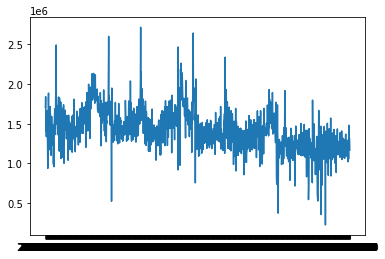

In [96]:
plt.plot(건입동['base_date'], 건입동['em_g'])
plt.show()

In [180]:
#test=음쓰df.groupby(['emd_nm', 'base_date']).agg({'em_cnt':"sum"})
남원읍=음쓰df[음쓰df['emd_nm']=="남원읍"]
남원읍=남원읍.groupby(['base_date']).agg({'em_g':"sum"})
남원읍.reset_index(inplace=True)
남원읍

,base_date,em_g
0,2018-01-01,1239600
1,2018-01-02,1569850
2,2018-01-03,1405650
3,2018-01-04,1390250
4,2018-01-05,1585700
...,...,...
1271,2021-06-26,1948850
1272,2021-06-27,2292900
1273,2021-06-28,2191650
1274,2021-06-29,2072350


In [181]:
idx=pd.date_range("2018-01-01","2021-06-30")
getNanDate(idx, 남원읍)

['2020-10-23']

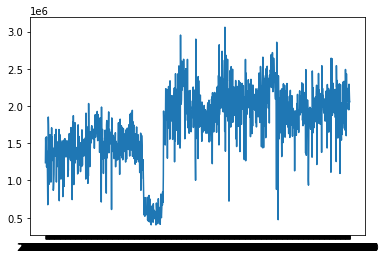

In [182]:
plt.plot(남원읍['base_date'], 남원읍['em_g'])
plt.show()

In [183]:
노형동=음쓰df[음쓰df['emd_nm']=="노형동"]
노형동=노형동.groupby(['base_date']).agg({'em_g':"sum"})
노형동.reset_index(inplace=True)
idx=pd.date_range("2018-01-01","2021-06-30")
getNanDate(idx, 노형동)

[]

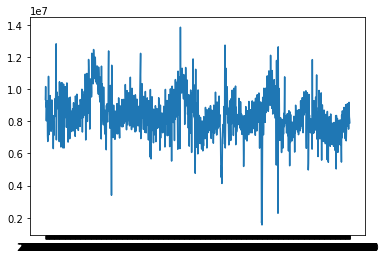

In [185]:
plt.plot(노형동['base_date'], 노형동['em_g'])
plt.show()

In [186]:
대정읍=음쓰df[음쓰df['emd_nm']=="대정읍"]
대정읍=대정읍.groupby(['base_date']).agg({'em_g':"sum"})
대정읍.reset_index(inplace=True)
idx=pd.date_range("2018-01-01","2021-06-30")
getNanDate(idx, 대정읍)

['2020-10-23']

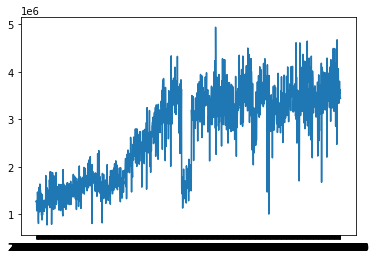

In [187]:
plt.plot(대정읍['base_date'], 대정읍['em_g'])
plt.show()

In [97]:
구좌읍=음쓰df[음쓰df['emd_nm']=="구좌읍"]
구좌읍=구좌읍.groupby(['base_date']).agg({'em_g':"sum"})
구좌읍.reset_index(inplace=True)
구좌읍

,base_date,em_g
0,2019-11-05,1500
1,2019-11-06,14050
2,2019-11-07,18850
3,2019-11-08,18850
4,2019-11-09,88700
...,...,...
595,2021-06-26,1426300
596,2021-06-27,1382150
597,2021-06-28,1263300
598,2021-06-29,1336600


In [98]:
idx=pd.date_range("2019-11-05","2021-06-30")
getNanDate(idx, 구좌읍)

['2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28']

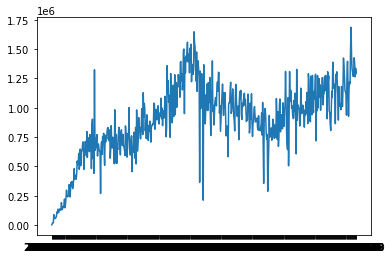

In [99]:
plt.plot(구좌읍['base_date'], 구좌읍['em_g'])
plt.show()

In [100]:
한림읍=음쓰df[음쓰df['emd_nm']=="한림읍"]
한림읍=한림읍.groupby(['base_date']).agg({'em_g':"sum"})
한림읍.reset_index(inplace=True)
한림읍

,base_date,em_g
0,2019-11-05,0
1,2019-11-06,0
2,2019-11-07,3300
3,2019-11-08,6450
4,2019-11-09,5150
...,...,...
594,2021-06-26,2885450
595,2021-06-27,2241700
596,2021-06-28,3105500
597,2021-06-29,2733100


In [101]:
idx=pd.date_range("2019-11-05","2021-06-30")
getNanDate(idx, 한림읍)

['2019-11-10', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28']

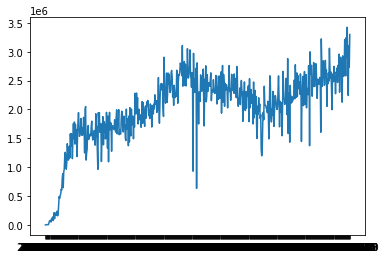

In [102]:
plt.plot(한림읍['base_date'], 한림읍['em_g'])
plt.show()

In [103]:
한경면=음쓰df[음쓰df['emd_nm']=="한경면"]
한경면=한경면.groupby(['base_date']).agg({'em_g':"sum"})
한경면.reset_index(inplace=True)
한경면

,base_date,em_g
0,2019-11-07,3250
1,2019-11-08,2350
2,2019-11-09,600
3,2019-11-11,1050
4,2019-11-12,25600
...,...,...
592,2021-06-26,910700
593,2021-06-27,869550
594,2021-06-28,1049350
595,2021-06-29,959850


In [104]:
idx=pd.date_range("2019-11-07","2021-06-30")
getNanDate(idx, 한경면)

['2019-11-10', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28']

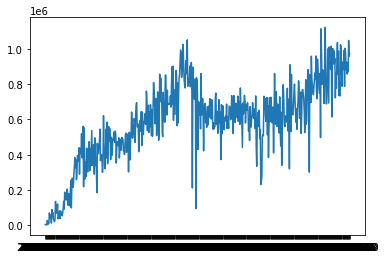

In [105]:
plt.plot(한경면['base_date'], 한경면['em_g'])
plt.show()

In [106]:
조천읍=음쓰df[음쓰df['emd_nm']=="조천읍"]
조천읍=조천읍.groupby(['base_date']).agg({'em_g':"sum"})
조천읍.reset_index(inplace=True)
조천읍

,base_date,em_g
0,2019-11-04,6150
1,2019-11-05,36550
2,2019-11-06,41500
3,2019-11-07,28100
4,2019-11-08,13500
...,...,...
600,2021-06-26,2476050
601,2021-06-27,2302900
602,2021-06-28,2311750
603,2021-06-29,2257300


In [107]:
idx=pd.date_range("2019-11-07","2021-06-30")
getNanDate(idx, 조천읍)

[]

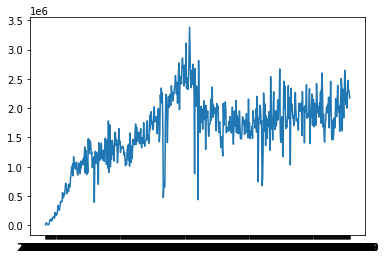

In [108]:
plt.plot(조천읍['base_date'], 조천읍['em_g'])
plt.show()

# 음쓰 결측치 정리 방법

## 1. interpolate

In [118]:
idx=pd.date_range("2019-11-07","2021-06-30")
dateidx=[]
for i in range(len(idx)):
        year=str(idx[i].year)
        month=str(idx[i].month)
        day=str(idx[i].day)
        if len(month)<2:
            month="0"+month
        if len(day)<2:
            day="0"+day
        date=year+"-"+month+"-"+day
        dateidx.append(date)

한경면_new=pd.DataFrame(dateidx, columns=['base_date'])
한경면_new['em_g']=-1
losslist=getNanDate(idx, 한경면)

for i in range(len(한경면_new)):
    if 한경면_new.loc[i, "base_date"] in losslist:
        한경면_new.loc[i,'em_g']=0
    else:
        dateidx=한경면.index[한경면['base_date'] == 한경면_new.loc[i, "base_date"]]
        한경면_new.loc[i,'em_g']=한경면.loc[dateidx[0], "em_g"]

한경면_new

,base_date,em_g
0,2019-11-07,3250
1,2019-11-08,2350
2,2019-11-09,600
3,2019-11-10,0
4,2019-11-11,1050
...,...,...
597,2021-06-26,910700
598,2021-06-27,869550
599,2021-06-28,1049350
600,2021-06-29,959850


In [119]:
getNanDate(idx, 한경면_new)

[]

In [121]:
한경면_new[한경면_new['em_g']==0]

,base_date,em_g
3,2019-11-10,0
231,2020-06-25,0
232,2020-06-26,0
233,2020-06-27,0
234,2020-06-28,0


## 2. ARIMA

In [122]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(한경면_new['em_g'], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.em_g   No. Observations:                  601
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -7872.092
Method:                       css-mle   S.D. of innovations         118003.017
Date:                Sun, 05 Sep 2021   AIC                          15750.183
Time:                        21:36:58   BIC                          15763.379
Sample:                             1   HQIC                         15755.320
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1614.9750    885.235      1.824      0.068    -120.054    3350.005
ma.L1.D.em_g    -0.8175      0.029    -27.812      0.000      -0.875      -0.760
                                    Roots   

In [123]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(한경면_new['em_g'], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.em_g   No. Observations:                  601
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -7873.554
Method:                       css-mle   S.D. of innovations         118296.513
Date:                Sun, 05 Sep 2021   AIC                          15751.108
Time:                        21:37:31   BIC                          15759.905
Sample:                             1   HQIC                         15754.532
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D.em_g    -0.8047      0.029    -27.308      0.000      -0.862      -0.747
                                    Roots                                    
                  Real          Imaginary      

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


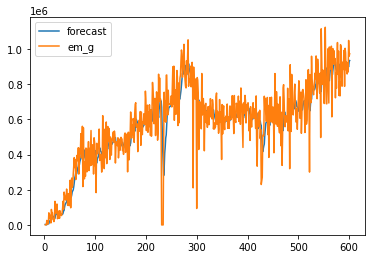

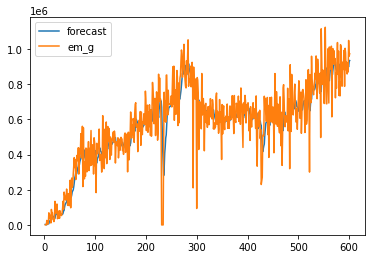

In [124]:
model_fit.plot_predict()

In [125]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([942628.31947449]), array([118296.51330527]), array([[ 710771.4138995 , 1174485.22504948]]))


## 3. 시계열 분해법

<ipython-input-126-5ceff0cf1e29>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result=seasonal_decompose(한경면_new['em_g'], model='additive', freq=7)
findfont: Font family ['HMFMPYUN'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

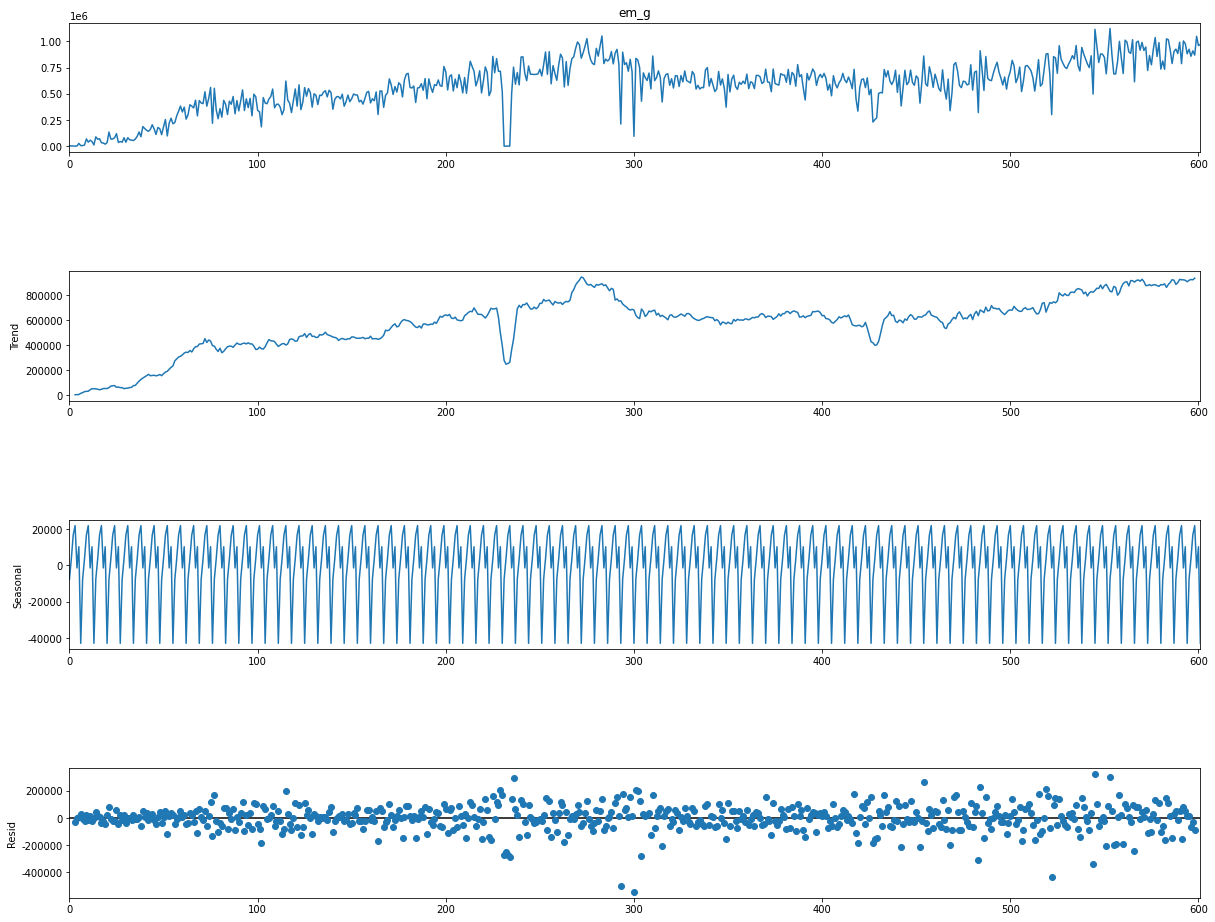

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(한경면_new['em_g'], model='additive', freq=7)

fig=plt.figure()
fig=result.plot()
fig.set_size_inches(20,15)

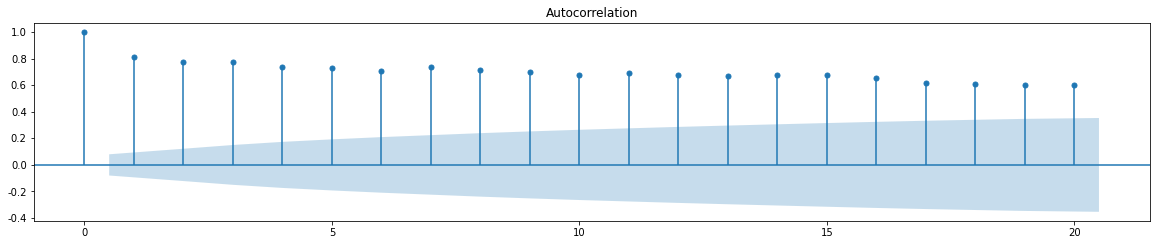

In [131]:
import statsmodels.api as sm

fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(한경면_new['em_g'], lags=20, ax=ax1)

## 4. 타 변수 이용?

In [399]:
행정동명1=["건입동", "남원읍", "노형동", "대륜동", "대정읍", "대천동", "도두동", "동홍동", 
      "봉개동", "삼도1동", "삼도2동", "삼양동", "서홍동", "성산읍", "송산동", "아라동", "안덕면",
      "애월읍", "연동", "영천동", "예래동", "오라동", "외도동", "용담1동", "용담2동", 
      "이도1동", "이도2동", "이호동", "일도1동", "일도2동", "정방동", "중문동", "중앙동", 
      "천지동", "표선면", "화북동", "효돈동"]

행정동명2=["구좌읍", '조천읍', "한경면", "한림읍"]

In [400]:
idx1=pd.date_range("2018-01-01","2021-06-30")
dateidx1=[]
for i in range(len(idx1)):
        year=str(idx1[i].year)
        month=str(idx1[i].month)
        day=str(idx1[i].day)
        if len(month)<2:
            month="0"+month
        if len(day)<2:
            day="0"+day
        date=year+"-"+month+"-"+day
        dateidx1.append(date)
idx2=pd.date_range("2019-11-05","2021-06-30")
dateidx2=[]
for i in range(len(idx2)):
        year=str(idx2[i].year)
        month=str(idx2[i].month)
        day=str(idx2[i].day)
        if len(month)<2:
            month="0"+month
        if len(day)<2:
            day="0"+day
        date=year+"-"+month+"-"+day
        dateidx2.append(date)

In [401]:
df1_1=pd.DataFrame([[0]*len(행정동명1)]*len(dateidx1), columns=행정동명1)
df2_1=pd.DataFrame([[0]*len(행정동명2)]*len(dateidx2), columns=행정동명2)
df1=pd.DataFrame(dateidx1, columns=["base_date"])
df2=pd.DataFrame(dateidx2, columns=["base_date"])
df1=pd.concat([df1, df1_1], axis=1)
df2=pd.concat([df2, df2_1], axis=1)
df1

,base_date,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
0,2018-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2021-06-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,2021-06-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1274,2021-06-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1275,2021-06-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
df2

,base_date,구좌읍,조천읍,한경면,한림읍
0,2019-11-05,0,0,0,0
1,2019-11-06,0,0,0,0
2,2019-11-07,0,0,0,0
3,2019-11-08,0,0,0,0
4,2019-11-09,0,0,0,0
...,...,...,...,...,...
599,2021-06-26,0,0,0,0
600,2021-06-27,0,0,0,0
601,2021-06-28,0,0,0,0
602,2021-06-29,0,0,0,0


In [403]:
def 행정동추가(idx, dateidx, dong, df):
    dng=음쓰df[음쓰df['emd_nm']==dong]
    dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
    dng.reset_index(inplace=True)

    new=pd.DataFrame(dateidx, columns=['base_date'])
    new['em_g']=0
    losslist=getNanDate(idx, dng)

    for i in range(len(new)):
        if new.loc[i, "base_date"] in losslist:
            new.loc[i,'em_g']=np.nan
        else:
            dateidx=dng.index[dng['base_date'] == new.loc[i, "base_date"]]
            new.loc[i,'em_g']=dng.loc[dateidx[0], "em_g"]

    df[dong]=new['em_g']
    return df

In [404]:
일도1동=음쓰df[음쓰df['emd_nm']=="일도1동"]
일도1동=일도1동.groupby(['base_date']).agg({'em_g':"sum"})
일도1동.reset_index(inplace=True)
getNanDate(idx1, 일도1동)

['2021-03-20',
 '2021-06-19',
 '2021-06-20',
 '2021-06-21',
 '2021-06-22',
 '2021-06-23',
 '2021-06-24',
 '2021-06-25',
 '2021-06-26',
 '2021-06-27',
 '2021-06-28',
 '2021-06-29',
 '2021-06-30']

In [405]:
for i in range(len(행정동명1)):
    df1=행정동추가(idx1, dateidx1, 행정동명1[i], df1)
    
df1

,base_date,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
0,2018-01-01,1708250.0,1239600.0,9357900,1717700.0,1264950.0,1765600.0,613300,4165050.0,395300,...,625550.0,718950.0,6478450,1025900.0,1699100.0,1384300.0,1133000.0,452850.0,4728700,444650.0
1,2018-01-02,1841150.0,1569850.0,10152950,2121750.0,1278200.0,2148050.0,748400,4361400.0,356300,...,801050.0,678450.0,6574000,967650.0,1847400.0,1794650.0,1268450.0,366050.0,4374000,822950.0
2,2018-01-03,1411450.0,1405650.0,8899800,1920300.0,1284450.0,2061650.0,538000,4028450.0,300400,...,498400.0,657850.0,5490000,921250.0,1577550.0,1799100.0,1242400.0,511600.0,3691250,577200.0
3,2018-01-04,1558700.0,1390250.0,9141400,1710000.0,1070000.0,1735000.0,444450,3725450.0,483350,...,643350.0,693850.0,5922250,813300.0,1699900.0,1611050.0,1085600.0,366600.0,3729850,584850.0
4,2018-01-05,1338350.0,1585700.0,8024400,1803600.0,1242000.0,1978850.0,333800,4205100.0,265300,...,481350.0,682950.0,5250150,860550.0,1744100.0,1839150.0,1396200.0,420500.0,3342200,669700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2021-06-26,1482150.0,1948850.0,7835650,1711650.0,3798350.0,1753950.0,685500,3434800.0,538300,...,722700.0,NaN,5137500,858300.0,2558150.0,1348400.0,1137500.0,1503900.0,3787050,853350.0
1273,2021-06-27,1446550.0,2292900.0,9172600,1896400.0,3541700.0,2182150.0,987150,3748200.0,579250,...,774750.0,NaN,6119700,877000.0,2510250.0,1161200.0,1056550.0,1482800.0,4199000,992150.0
1274,2021-06-28,1323550.0,2191650.0,8274150,1879450.0,3623300.0,2171950.0,604050,3595350.0,599500,...,772750.0,NaN,5128300,880050.0,2411600.0,1333700.0,1098450.0,1581900.0,3903950,956900.0
1275,2021-06-29,1310650.0,2072350.0,8130450,1840100.0,3460250.0,1877550.0,655150,3526400.0,579750,...,945300.0,NaN,4971700,849100.0,2170500.0,1377150.0,1086250.0,1352550.0,3680700,900500.0


In [406]:
for i in range(len(행정동명2)):
    df2=행정동추가(idx2, dateidx2, 행정동명2[i], df2)
df2

,base_date,구좌읍,조천읍,한경면,한림읍
0,2019-11-05,1500.0,36550,NaN,0.0
1,2019-11-06,14050.0,41500,NaN,0.0
2,2019-11-07,18850.0,28100,3250.0,3300.0
3,2019-11-08,18850.0,13500,2350.0,6450.0
4,2019-11-09,88700.0,8800,600.0,5150.0
...,...,...,...,...,...
599,2021-06-26,1426300.0,2476050,910700.0,2885450.0
600,2021-06-27,1382150.0,2302900,869550.0,2241700.0
601,2021-06-28,1263300.0,2311750,1049350.0,3105500.0
602,2021-06-29,1336600.0,2257300,959850.0,2733100.0


In [407]:
def countzero(행정동리스트):
    listing=[]
    for 행정동 in 행정동리스트:
        listing.append(list(df1[행정동]).count(0))
    return listing


In [408]:
czlist=pd.Series(countzero(행정동명1))
empty_df=pd.DataFrame(행정동명1, columns=["행정동명"])
empty_df=pd.concat([empty_df, czlist], axis=1)
empty_df['유사행정동명1']=""
empty_df['유사도1']=0
empty_df['유사행정동명2']=""
empty_df['유사도2']=0

In [409]:
df1_corr=df1.corr()
#plt.matshow(df1_corr)
#plt.show()

# 가장 높은 값 찾기
n=len(df1_corr)

for i in range(n):
    maxy1=0
    maxy2=0
    x1, y1=0,0
    x2, y2=0,0
    for j in range(n):
        if df1_corr.iloc[i, j]>maxy1 and df1_corr.iloc[i, j]!=1.0:
            maxy1=df1_corr.iloc[i, j]
            x1, y1 = i, j
            continue
        elif df1_corr.iloc[i, j]>maxy2 and df1_corr.iloc[i, j]!=1.0:
            maxy2=df1_corr.iloc[i, j]
            x2, y2 = i, j
            continue
    empty_df.loc[i, '유사행정동명1']=행정동명1[y1]
    empty_df.loc[i, '유사도1']=maxy1
    empty_df.loc[i, '유사행정동명2']=행정동명1[y2]
    empty_df.loc[i, '유사도2']=maxy2
        
#print(maxy, 행정동명1[x], 행정동명1[y])
empty_df.rename(columns = {0 : '결측수'}, inplace = True)

결측df=empty_df[empty_df['결측수']>0]
결측df

,행정동명,결측수,유사행정동명1,유사도1,유사행정동명2,유사도2


In [410]:
df1

,base_date,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
0,2018-01-01,1708250.0,1239600.0,9357900,1717700.0,1264950.0,1765600.0,613300,4165050.0,395300,...,625550.0,718950.0,6478450,1025900.0,1699100.0,1384300.0,1133000.0,452850.0,4728700,444650.0
1,2018-01-02,1841150.0,1569850.0,10152950,2121750.0,1278200.0,2148050.0,748400,4361400.0,356300,...,801050.0,678450.0,6574000,967650.0,1847400.0,1794650.0,1268450.0,366050.0,4374000,822950.0
2,2018-01-03,1411450.0,1405650.0,8899800,1920300.0,1284450.0,2061650.0,538000,4028450.0,300400,...,498400.0,657850.0,5490000,921250.0,1577550.0,1799100.0,1242400.0,511600.0,3691250,577200.0
3,2018-01-04,1558700.0,1390250.0,9141400,1710000.0,1070000.0,1735000.0,444450,3725450.0,483350,...,643350.0,693850.0,5922250,813300.0,1699900.0,1611050.0,1085600.0,366600.0,3729850,584850.0
4,2018-01-05,1338350.0,1585700.0,8024400,1803600.0,1242000.0,1978850.0,333800,4205100.0,265300,...,481350.0,682950.0,5250150,860550.0,1744100.0,1839150.0,1396200.0,420500.0,3342200,669700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2021-06-26,1482150.0,1948850.0,7835650,1711650.0,3798350.0,1753950.0,685500,3434800.0,538300,...,722700.0,NaN,5137500,858300.0,2558150.0,1348400.0,1137500.0,1503900.0,3787050,853350.0
1273,2021-06-27,1446550.0,2292900.0,9172600,1896400.0,3541700.0,2182150.0,987150,3748200.0,579250,...,774750.0,NaN,6119700,877000.0,2510250.0,1161200.0,1056550.0,1482800.0,4199000,992150.0
1274,2021-06-28,1323550.0,2191650.0,8274150,1879450.0,3623300.0,2171950.0,604050,3595350.0,599500,...,772750.0,NaN,5128300,880050.0,2411600.0,1333700.0,1098450.0,1581900.0,3903950,956900.0
1275,2021-06-29,1310650.0,2072350.0,8130450,1840100.0,3460250.0,1877550.0,655150,3526400.0,579750,...,945300.0,NaN,4971700,849100.0,2170500.0,1377150.0,1086250.0,1352550.0,3680700,900500.0


In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


In [412]:
df=pd.concat([df1['base_date'], df1[empty_df.loc[0, '행정동명']], df1[empty_df.loc[0, '유사행정동명1']], df1[empty_df.loc[0, '유사행정동명2']]], axis=1)
df

,base_date,건입동,삼도1동,용담2동
0,2018-01-01,1708250.0,2556750,2581850
1,2018-01-02,1841150.0,2724050,2625900
2,2018-01-03,1411450.0,2333350,2276350
3,2018-01-04,1558700.0,2503300,2337500
4,2018-01-05,1338350.0,2238050,2017000
...,...,...,...,...
1272,2021-06-26,1482150.0,2217450,2096650
1273,2021-06-27,1446550.0,2177350,2407150
1274,2021-06-28,1323550.0,1917150,2136950
1275,2021-06-29,1310650.0,1978050,2099450


In [413]:
for 행정동 in 행정동명1:
    dng=음쓰df[음쓰df['emd_nm']==행정동]
    dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
    dng.reset_index(inplace=True)
    print(행정동, ": ", getNanDate(idx1, dng))
    

건입동 :  ['2021-03-20']
남원읍 :  ['2020-10-23']
노형동 :  []
대륜동 :  ['2020-10-23']
대정읍 :  ['2020-10-23']
대천동 :  ['2020-10-23']
도두동 :  []
동홍동 :  ['2020-10-23']
봉개동 :  []
삼도1동 :  []
삼도2동 :  []
삼양동 :  []
서홍동 :  ['2020-10-23']
성산읍 :  ['2020-10-23']
송산동 :  ['2020-10-23']
아라동 :  []
안덕면 :  ['2020-10-23']
애월읍 :  ['2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28']
연동 :  []
영천동 :  ['2020-10-23']
예래동 :  ['2020-10-23']
오라동 :  []
외도동 :  []
용담1동 :  ['2021-03-20']
용담2동 :  []
이도1동 :  []
이도2동 :  []
이호동 :  ['2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2021-03-20']
일도1동 :  ['2021-03-20', '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30']
일도2동 :  []
정방동 :  ['2020-10-23']
중문동 :  ['2020-10-23']
중앙동 :  ['2020-10-23']
천지동 :  ['2020-10-23']
표선면 :  ['2020-10-23']
화북동 :  []
효돈동 :  ['2020-10-23']


## 결측 채워야하는 동 : 해당 값에 결측 아닌 유사행정동명1, 유사행정동명2
건입동 : 삼도1동, 용담2동
남원읍 : 
대륜동 : 
대정읍 : 애월읍
대천동 : 
동흥동 : 
서홍동 : 
성산읍 : 
송산동 : 
안덕면 : 
애월읍 : 안덕면, 표선면
영천동 : 
예래동 : 
용담1동 : 삼도1동, 이도2동
이호동 : 외도동, 화북동
일도1동 : 이도1동
정방동 : 
중문동 : 
중앙동 : 
천지동 : 
표선면 : 애월읍
효돈동 :

In [414]:
fit = ols('건입동 ~ 삼도1동',data=df1).fit()
#fit.summary()

idx=df1.index[df1["base_date"]=="2021-03-20"].tolist()[0]
val=df1.loc[idx, "삼도1동"]
fit.predict(exog=dict(삼도1동=[val]))
df1.loc[idx, "건입동"]=fit.predict(exog=dict(삼도1동=[val]))[0]
df1.loc[:, "건입동"].isnull().value_counts()

False    1277
Name: 건입동, dtype: int64

In [415]:
fit = ols('대정읍 ~ 애월읍',data=df1).fit()
#fit.summary()

idx=df1.index[df1["base_date"]=="2020-10-23"].tolist()[0]
val=df1.loc[idx, "애월읍"]
fit.predict(exog=dict(애월읍=[val]))
df1.loc[idx, "대정읍"]=fit.predict(exog=dict(애월읍=[val]))[0]
df1.loc[:, "대정읍"].isnull().value_counts()

False    1277
Name: 대정읍, dtype: int64

In [416]:
fit = ols('애월읍 ~ 안덕면',data=df1).fit()
#fit.summary()

dng=음쓰df[음쓰df['emd_nm']=="애월읍"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dlist=getNanDate(idx1, dng)

for date in dlist:
    idx=df1.index[df1["base_date"]==date].tolist()[0]
    val=df1.loc[idx, "안덕면"]
    fit.predict(exog=dict(안덕면=[val]))
    df1.loc[idx, "애월읍"]=fit.predict(exog=dict(안덕면=[val]))[0]
df1.loc[:, "애월읍"].isnull().value_counts()

False    1277
Name: 애월읍, dtype: int64

In [417]:
fit = ols('용담1동 ~ 삼도1동',data=df1).fit()

idx=df1.index[df1["base_date"]=="2021-03-20"].tolist()[0]
val=df1.loc[idx, "삼도1동"]
fit.predict(exog=dict(삼도1동=[val]))
df1.loc[idx, "용담1동"]=fit.predict(exog=dict(삼도1동=[val]))[0]
df1.loc[:, "용담1동"].isnull().value_counts()

False    1277
Name: 용담1동, dtype: int64

In [418]:
fit = ols('일도1동 ~ 외도동',data=df1).fit()
#fit.summary()

dng=음쓰df[음쓰df['emd_nm']=="일도1동"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dlist=getNanDate(idx1, dng)

for date in dlist:
    idx=df1.index[df1["base_date"]==date].tolist()[0]
    val=df1.loc[idx, "외도동"]
    fit.predict(exog=dict(외도동=[val]))
    df1.loc[idx, "일도1동"]=fit.predict(exog=dict(외도동=[val]))[0]
df1.loc[:, "일도1동"].isnull().value_counts()

False    1277
Name: 일도1동, dtype: int64

In [419]:
fit = ols('이호동 ~ 이도1동',data=df1).fit()
#fit.summary()

dng=음쓰df[음쓰df['emd_nm']=="이호동"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dlist=getNanDate(idx1, dng)

for date in dlist:
    idx=df1.index[df1["base_date"]==date].tolist()[0]
    val=df1.loc[idx, "이도1동"]
    fit.predict(exog=dict(이도1동=[val]))
    df1.loc[idx, "이호동"]=fit.predict(exog=dict(이도1동=[val]))[0]
df1.loc[:, "이호동"].isnull().value_counts()

False    1277
Name: 이호동, dtype: int64

In [420]:
fit = ols('표선면 ~ 애월읍',data=df1).fit()

idx=df1.index[df1["base_date"]=="2020-10-23"].tolist()[0]
val=df1.loc[idx, "애월읍"]
fit.predict(exog=dict(애월읍=[val]))
df1.loc[idx, "표선면"]=fit.predict(exog=dict(애월읍=[val]))[0]
df1.loc[:, "표선면"].isnull().value_counts()

False    1277
Name: 표선면, dtype: int64

In [425]:
df1[df1['base_date']=='2020-10-23']

,base_date,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
1026,2020-10-23,1073400.0,NaN,6834250,NaN,3.334138e+06,NaN,480250,NaN,443850,...,629550.0,649550.0,4130400,NaN,NaN,NaN,NaN,1.080906e+06,2862100,NaN


In [429]:
#2020.10.23은 결측열이 너무너무샹 많아서 전주 같은 요일 것으로 대리해서 채우겠음
없는행정동=["남원읍", '대륜동', '대정읍', '대천동', '동홍동', '서홍동', '성산읍', '송산동', '안덕면', '영천동', '예래동', '정방동', '중문동', '중앙동', '천지동', '표선면', '효돈동']
for 행정동 in 없는행정동:
    df1.loc[1026, 행정동]=df1.loc[1019, 행정동]

In [431]:
df1.isnull().value_counts()

base_date  건입동    남원읍    노형동    대륜동    대정읍    대천동    도두동    동홍동    봉개동    삼도1동   삼도2동   삼양동    서홍동    성산읍    송산동    아라동    안덕면    애월읍    연동     영천동    예래동    오라동    외도동    용담1동   용담2동   이도1동   이도2동   이호동    일도1동   일도2동   정방동    중문동    중앙동    천지동    표선면    화북동    효돈동  
False      False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    1277
dtype: int64

In [435]:
df1.to_csv("전처리/ㅇf1")

,base_date,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
0,2018-01-01,1708250.0,1239600.0,9357900,1717700.0,1264950.0,1765600.0,613300,4165050.0,395300,...,625550.0,718950.000000,6478450,1025900.0,1699100.0,1384300.0,1133000.0,452850.0,4728700,444650.0
1,2018-01-02,1841150.0,1569850.0,10152950,2121750.0,1278200.0,2148050.0,748400,4361400.0,356300,...,801050.0,678450.000000,6574000,967650.0,1847400.0,1794650.0,1268450.0,366050.0,4374000,822950.0
2,2018-01-03,1411450.0,1405650.0,8899800,1920300.0,1284450.0,2061650.0,538000,4028450.0,300400,...,498400.0,657850.000000,5490000,921250.0,1577550.0,1799100.0,1242400.0,511600.0,3691250,577200.0
3,2018-01-04,1558700.0,1390250.0,9141400,1710000.0,1070000.0,1735000.0,444450,3725450.0,483350,...,643350.0,693850.000000,5922250,813300.0,1699900.0,1611050.0,1085600.0,366600.0,3729850,584850.0
4,2018-01-05,1338350.0,1585700.0,8024400,1803600.0,1242000.0,1978850.0,333800,4205100.0,265300,...,481350.0,682950.000000,5250150,860550.0,1744100.0,1839150.0,1396200.0,420500.0,3342200,669700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2021-06-26,1482150.0,1948850.0,7835650,1711650.0,3798350.0,1753950.0,685500,3434800.0,538300,...,722700.0,650116.021366,5137500,858300.0,2558150.0,1348400.0,1137500.0,1503900.0,3787050,853350.0
1273,2021-06-27,1446550.0,2292900.0,9172600,1896400.0,3541700.0,2182150.0,987150,3748200.0,579250,...,774750.0,688907.666725,6119700,877000.0,2510250.0,1161200.0,1056550.0,1482800.0,4199000,992150.0
1274,2021-06-28,1323550.0,2191650.0,8274150,1879450.0,3623300.0,2171950.0,604050,3595350.0,599500,...,772750.0,670887.855989,5128300,880050.0,2411600.0,1333700.0,1098450.0,1581900.0,3903950,956900.0
1275,2021-06-29,1310650.0,2072350.0,8130450,1840100.0,3460250.0,1877550.0,655150,3526400.0,579750,...,945300.0,641796.245445,4971700,849100.0,2170500.0,1377150.0,1086250.0,1352550.0,3680700,900500.0


In [336]:
결측행정동=list(결측df["행정동명"])
결측행정동

['건입동',
 '남원읍',
 '대륜동',
 '대정읍',
 '대천동',
 '동홍동',
 '서홍동',
 '성산읍',
 '송산동',
 '안덕면',
 '애월읍',
 '영천동',
 '예래동',
 '용담1동',
 '이호동',
 '일도1동',
 '정방동',
 '중문동',
 '중앙동',
 '천지동',
 '표선면',
 '효돈동']

In [380]:
datelist=['2020-10-23','2021-03-20', '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30']
df1[df1['base_date']==datelist[0]]

,base_date,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
1026,2020-10-23,1073400.0,NaN,6834250,NaN,NaN,NaN,480250,NaN,443850,...,629550.0,649550.0,4130400,NaN,NaN,NaN,NaN,NaN,2862100,NaN


In [381]:
df1_1=df1.dropna(axis=0)
y=df1_1["남원읍"].values
X_df=df1_1.drop(["남원읍", "base_date"], axis=1)
X=X_df.dropna(axis=1).values

lr=LinearRegression()
lr.fit(X, y)

dng=음쓰df[음쓰df['emd_nm']=="남원읍"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dlist=getNanDate(idx1, dng)
for date in dlist:
    idx=df1.index[df1["base_date"]==date].tolist()[0]
    df1_1=df1.dropna(axis=1)
    df1_1.drop(['base_date'], axis=1, inplace=True)
    df1.loc[idx, "남원읍"]=lr.predict(df1_1.loc[idx, :].values.reshape(-1, 1))
df1.loc[idx, "남원읍"]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 36 is different from 1)

In [382]:
df1.dropna()

,base_date,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
0,2018-01-01,1708250.0,1239600.0,9357900,1717700.0,1264950.0,1765600.0,613300,4165050.0,395300,...,625550.0,718950.0,6478450,1025900.0,1699100.0,1384300.0,1133000.0,452850.0,4728700,444650.0
1,2018-01-02,1841150.0,1569850.0,10152950,2121750.0,1278200.0,2148050.0,748400,4361400.0,356300,...,801050.0,678450.0,6574000,967650.0,1847400.0,1794650.0,1268450.0,366050.0,4374000,822950.0
2,2018-01-03,1411450.0,1405650.0,8899800,1920300.0,1284450.0,2061650.0,538000,4028450.0,300400,...,498400.0,657850.0,5490000,921250.0,1577550.0,1799100.0,1242400.0,511600.0,3691250,577200.0
3,2018-01-04,1558700.0,1390250.0,9141400,1710000.0,1070000.0,1735000.0,444450,3725450.0,483350,...,643350.0,693850.0,5922250,813300.0,1699900.0,1611050.0,1085600.0,366600.0,3729850,584850.0
4,2018-01-05,1338350.0,1585700.0,8024400,1803600.0,1242000.0,1978850.0,333800,4205100.0,265300,...,481350.0,682950.0,5250150,860550.0,1744100.0,1839150.0,1396200.0,420500.0,3342200,669700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,2021-06-14,1174500.0,2263100.0,8403200,1605250.0,3690900.0,1989150.0,575200,3020100.0,605400,...,733550.0,150900.0,4979950,689350.0,1752550.0,1387250.0,1048350.0,1469100.0,3701400,1037600.0
1261,2021-06-15,1111000.0,1601900.0,6783350,1306200.0,2471150.0,1355500.0,505700,1994600.0,436150,...,574300.0,35700.0,4171350,647300.0,1331250.0,1001200.0,753950.0,1173250.0,3255250,625350.0
1262,2021-06-16,1254600.0,2432950.0,7501300,1638000.0,4671400.0,2020600.0,700850,2870000.0,513500,...,694000.0,15650.0,4705850,684650.0,2376700.0,1508250.0,1328300.0,1530950.0,3567800,1135050.0
1263,2021-06-17,1092600.0,2062900.0,7912600,1426800.0,3674850.0,1934950.0,661450,2704400.0,511100,...,728050.0,26650.0,4645700,574150.0,2067400.0,1418300.0,1004600.0,1309050.0,3388400,921850.0


In [367]:
df1_1.loc[idx, :]

array([6834250,  480250,  443850, 1714000,  764350, 2349100, 2882700,
       5487600, 1528250, 2746950, 1650250, 1208550, 6228450, 4130400,
       2862100], dtype=int64)

In [330]:
dng=음쓰df[음쓰df['emd_nm']=="건입동"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
df1[df1['base_date'] in getNanDate(idx1, dng)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [437]:
df2_corr=df2.corr()


# 가장 높은 값 찾기
n=len(df2_corr)
maxy=0
x, y=0,0
for i in range(n):
    for j in range(n):
        if df2_corr.iloc[i, j]>maxy and df2_corr.iloc[i, j]!=1.0:
            maxy=df2_corr.iloc[i, j]
            x, y = i, j
            continue
        
print(maxy, 행정동명2[x], 행정동명2[y])

0.9300185312615092 구좌읍 조천읍


In [438]:
def countzero(행정동리스트):
    listing=[]
    for 행정동 in 행정동리스트:
        listing.append(list(df2[행정동]).count(0))
    return listing


In [439]:
czlist=pd.Series(countzero(행정동명2))
empty_df=pd.DataFrame(행정동명2, columns=["행정동명"])
empty_df=pd.concat([empty_df, czlist], axis=1)
empty_df['유사행정동명1']=""
empty_df['유사도1']=0
empty_df['유사행정동명2']=""
empty_df['유사도2']=0

In [444]:
df2_corr=df2.corr()
#plt.matshow(df1_corr)
#plt.show()

# 가장 높은 값 찾기
n=len(df2_corr)

for i in range(n):
    maxy1=0
    maxy2=0
    x1, y1=0,0
    x2, y2=0,0
    for j in range(n):
        if df2_corr.iloc[i, j]>maxy1 and df2_corr.iloc[i, j]!=1.0:
            maxy1=df2_corr.iloc[i, j]
            x1, y1 = i, j
            continue
        elif df2_corr.iloc[i, j]>maxy2 and df2_corr.iloc[i, j]!=1.0:
            maxy2=df2_corr.iloc[i, j]
            x2, y2 = i, j
            continue
    empty_df.loc[i, '유사행정동명1']=행정동명2[y1]
    empty_df.loc[i, '유사도1']=maxy1
    empty_df.loc[i, '유사행정동명2']=행정동명2[y2]
    empty_df.loc[i, '유사도2']=maxy2
        
#print(maxy, 행정동명1[x], 행정동명1[y])
empty_df.rename(columns = {0 : '결측수'}, inplace = True)
empty_df
#결측df=empty_df[empty_df['결측수']>0]
#결측df

,행정동명,결측수,유사행정동명1,유사도1,유사행정동명2,유사도2
0,구좌읍,0,조천읍,0.930019,한림읍,0.896042
1,조천읍,0,구좌읍,0.930019,한림읍,0.876969
2,한경면,0,한림읍,0.892704,조천읍,0.871604
3,한림읍,2,구좌읍,0.896042,한경면,0.892704


In [442]:
for 행정동 in 행정동명2:
    dng=음쓰df[음쓰df['emd_nm']==행정동]
    dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
    dng.reset_index(inplace=True)
    print(행정동, ": ", getNanDate(idx2, dng))

구좌읍 :  ['2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28']
조천읍 :  []
한경면 :  ['2019-11-05', '2019-11-06', '2019-11-10', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28']
한림읍 :  ['2019-11-10', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28']


In [445]:
fit = ols('구좌읍 ~ 조천읍',data=df2).fit()
#fit.summary()

dng=음쓰df[음쓰df['emd_nm']=="구좌읍"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dlist=getNanDate(idx2, dng)

for date in dlist:
    idx=df2.index[df2["base_date"]==date].tolist()[0]
    val=df2.loc[idx, "조천읍"]
    fit.predict(exog=dict(조천읍=[val]))
    df2.loc[idx, "구좌읍"]=fit.predict(exog=dict(조천읍=[val]))[0]
df2.loc[:, "구좌읍"].isnull().value_counts()

False    604
Name: 구좌읍, dtype: int64

In [447]:
fit = ols('한경면 ~ 조천읍',data=df2).fit()
#fit.summary()

dng=음쓰df[음쓰df['emd_nm']=="한경면"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dlist=getNanDate(idx2, dng)

for date in dlist:
    idx=df2.index[df2["base_date"]==date].tolist()[0]
    val=df2.loc[idx, "조천읍"]
    fit.predict(exog=dict(조천읍=[val]))
    df2.loc[idx, "한경면"]=fit.predict(exog=dict(조천읍=[val]))[0]
df2.loc[:, "한경면"].isnull().value_counts()

False    604
Name: 한경면, dtype: int64

In [449]:
fit = ols('한림읍 ~ 구좌읍',data=df2).fit()
#fit.summary()

dng=음쓰df[음쓰df['emd_nm']=="한림읍"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dlist=getNanDate(idx2, dng)
dlist.append('2019-11-05')
dlist.append('2019-11-06')

for date in dlist:
    idx=df2.index[df2["base_date"]==date].tolist()[0]
    val=df2.loc[idx, "구좌읍"]
    fit.predict(exog=dict(구좌읍=[val]))
    df2.loc[idx, "한림읍"]=fit.predict(exog=dict(구좌읍=[val]))[0]
df2.loc[:, "한림읍"].isnull().value_counts()

False    604
Name: 한림읍, dtype: int64

In [450]:
df2.isnull().value_counts()

base_date  구좌읍    조천읍    한경면    한림읍  
False      False  False  False  False    604
dtype: int64

In [451]:
df2.to_csv("전처리/평가데이터2.csv")

In [201]:
dng=음쓰df[음쓰df['emd_nm']=="구좌읍"]
dng=dng.groupby(['base_date']).agg({'em_g':"sum"})
dng.reset_index(inplace=True)
dng

,base_date,em_g
0,2019-11-05,1500
1,2019-11-06,14050
2,2019-11-07,18850
3,2019-11-08,18850
4,2019-11-09,88700
...,...,...
595,2021-06-26,1426300
596,2021-06-27,1382150
597,2021-06-28,1263300
598,2021-06-29,1336600


In [ ]:
df1.isnull().value_counts()

In [29]:
idx=pd.date_range("2018-01-01","2021-06-30")
len(idx)

1277

In [27]:
idx=pd.date_range("2019-11-07","2021-06-30")
len(idx)

602

In [13]:
카드=pd.read_csv("04_음식관련 카드소비_CARD_SPENDING.CSV", encoding="cp949")
카드

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


In [14]:
카드.sort_values("base_date")

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
298099,2018-01-01,서귀포시,XXXXXXXX,알수없음,C00300,아시아음식,5,137480
459483,2018-01-01,제주시,50110580,용담2동,C01000,식품,157,5974341
220071,2018-01-01,제주시,50110250,한림읍,C00200,양식,29,1143048
35909,2018-01-01,제주시,50110250,한림읍,C01000,식품,368,13759637
246640,2018-01-01,제주시,50110530,이도1동,C00500,패스트푸드,113,2279026
...,...,...,...,...,...,...,...,...
450255,2021-06-30,제주시,50110253,애월읍,C00100,한식,2168,60234652
105533,2021-06-30,서귀포시,50130510,송산동,A00200,마트/슈퍼마켓,302,14697811
260309,2021-06-30,제주시,50110250,한림읍,C01400,배달,257,5508665
43508,2021-06-30,제주시,50110600,화북동,C01000,식품,513,21022684


In [15]:
카드['emd_nm'].value_counts()

알수없음    14308
노형동     13597
이도2동    13586
일도2동    13525
연동      13513
아라동     13496
조천읍     13380
삼양동     13353
화북동     13336
애월읍     13261
외도동     13246
삼도1동    13174
용담2동    13160
오라동     13134
동홍동     13114
건입동     13019
삼도2동    12902
이도1동    12870
한림읍     12779
서홍동     12774
대륜동     12709
남원읍     12695
대정읍     12693
중문동     12677
대천동     12648
용담1동    12632
구좌읍     12499
안덕면     12388
표선면     12363
성산읍     12360
이호동     11923
일도1동    11901
도두동     11741
한경면     11705
봉개동     11702
효돈동     11685
중앙동     11659
천지동     11616
영천동     11583
예래동     11499
송산동     11462
정방동     10951
우도면      7128
추자면      7059
Name: emd_nm, dtype: int64

In [16]:
카드1=카드[카드['emd_nm']=="알수없음"]
카드1

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
17732,2018-01-04,서귀포시,XXXXXXXX,알수없음,C00100,한식,44,2171693
17733,2018-01-08,서귀포시,XXXXXXXX,알수없음,C00100,한식,25,635845
17734,2018-01-16,서귀포시,XXXXXXXX,알수없음,C00400,간식,15,130115
17735,2018-01-17,제주시,XXXXXXXX,알수없음,C01200,농축수산물,5,101146
17736,2018-01-18,서귀포시,XXXXXXXX,알수없음,C00400,간식,10,95745
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715
